# CK+ DATASET EPOCHES 100, RESNET APLIED WITH Y OWN LAYRES 92 ACCURACY RECIEVED

In [1]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.utils import plot_model
from keras import regularizers
from tensorflow.keras.utils import plot_model
from keras.preprocessing import image

2023-12-03 14:56:12.339739: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-03 14:56:12.368963: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-03 14:56:12.951086: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


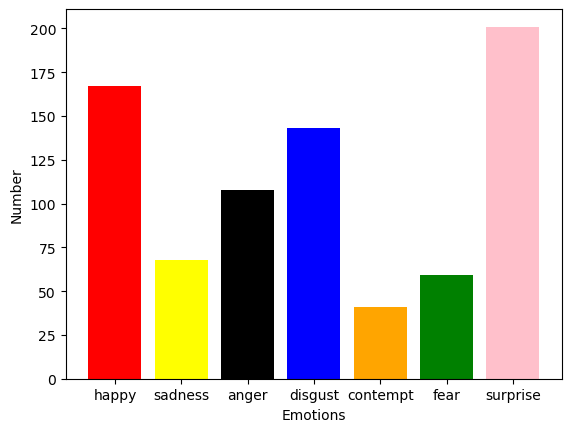

In [2]:
#histogram code
import matplotlib.pyplot as plt
import os

emotions = ["happy", "sadness", "anger", "disgust", "contempt", "fear", "surprise"]

folder_path = "CK+48/train"
# Counting the number of images per emotion
counts = [len(os.listdir(os.path.join(folder_path, emotion))) for emotion in emotions]

# Plotting the bar chart
colors = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink']
plt.bar(emotions, height=counts, color=colors)
plt.ylabel('Number')
plt.xlabel('Emotions')
plt.savefig('hostgoarm.png')
plt.show()

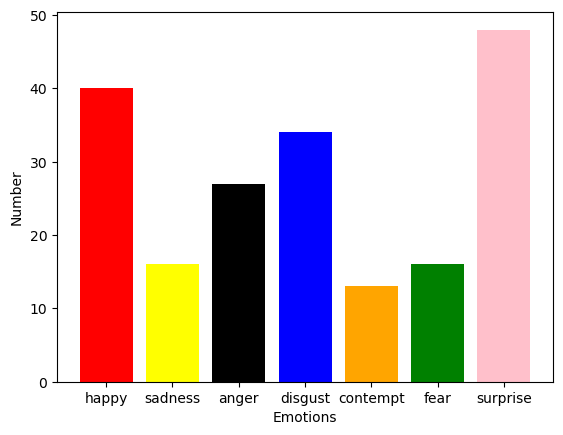

In [3]:
#that will give the histogram of emotons how many validation emtion in br garph form

# Defining paths and emotions
emotions = ["happy", "sadness", "anger", "disgust", "contempt", "fear", "surprise"]

folder_path = "CK+48/validation"

# Counting the number of images per emotion
counts = [len(os.listdir(os.path.join(folder_path, emotion))) for emotion in emotions]

# Plotting the bar chart
colors = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink']
plt.bar(emotions, height=counts, color=colors)
plt.ylabel('Number')
plt.xlabel('Emotions')
plt.savefig('hostgoarm.png')
plt.show()

In [4]:
batch_size  = 64
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_ds = datagen_train.flow_from_directory("CK+48/train",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True)


test_ds = datagen_val.flow_from_directory("CK+48/validation",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)
print('Train and Validation sets have been created.')


Found 787 images belonging to 7 classes.
Found 194 images belonging to 7 classes.
Train and Validation sets have been created.


In [5]:
# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')
# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')


Above data generator functions have been created.


In [6]:



from keras.applications.resnet import ResNet152
conv_base = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)

2023-12-03 14:56:14.330354: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-12-03 14:56:14.330454: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: RajeshUbuntu
2023-12-03 14:56:14.330462: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: RajeshUbuntu
2023-12-03 14:56:14.331398: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.129.3
2023-12-03 14:56:14.331477: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 535.129.3
2023-12-03 14:56:14.331485: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 535.129.3


In [7]:
conv_base.summary()

Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 24, 24, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                      

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 12, 12, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 12, 12, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 12, 12, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 6, 6, 512)            66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 6, 6, 512)            2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 6, 6, 512)            0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv3_block5_2_conv (Conv2  (None, 6, 6, 128)            147584    ['conv3_block5_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block5_2_bn (BatchNo  (None, 6, 6, 128)            512       ['conv3_block5_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block5_2_relu (Activ  (None, 6, 6, 128)            0         ['conv3_block5_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block5_3_conv (Conv2  (None, 6, 6, 512)            66048     ['conv3_block5_2_relu[0][0]'] 
 D)       

                                                                                                  
 conv3_block8_1_bn (BatchNo  (None, 6, 6, 128)            512       ['conv3_block8_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block8_1_relu (Activ  (None, 6, 6, 128)            0         ['conv3_block8_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block8_2_conv (Conv2  (None, 6, 6, 128)            147584    ['conv3_block8_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_blo

 D)                                                                                               
                                                                                                  
 conv4_block2_3_bn (BatchNo  (None, 3, 3, 1024)           4096      ['conv4_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block2_add (Add)      (None, 3, 3, 1024)           0         ['conv4_block1_out[0][0]',    
                                                                     'conv4_block2_3_bn[0][0]']   
                                                                                                  
 conv4_block2_out (Activati  (None, 3, 3, 1024)           0         ['conv4_block2_add[0][0]']    
 on)                                                                                              
          

 conv4_block5_2_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block5_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_2_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block5_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block5_3_conv (Conv2  (None, 3, 3, 1024)           263168    ['conv4_block5_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block5_3_bn (BatchNo  (None, 3, 3, 1024)           4096      ['conv4_block5_3_conv[0][0]'] 
 rmalizati

                                                                                                  
 conv4_block8_1_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block8_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block8_2_conv (Conv2  (None, 3, 3, 256)            590080    ['conv4_block8_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block8_2_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block8_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 ion)                                                                                             
                                                                                                  
 conv4_block11_1_conv (Conv  (None, 3, 3, 256)            262400    ['conv4_block10_out[0][0]']   
 2D)                                                                                              
                                                                                                  
 conv4_block11_1_bn (BatchN  (None, 3, 3, 256)            1024      ['conv4_block11_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block11_1_relu (Acti  (None, 3, 3, 256)            0         ['conv4_block11_1_bn[0][0]']  
 vation)                                                                                          
          

 conv4_block13_3_bn (BatchN  (None, 3, 3, 1024)           4096      ['conv4_block13_3_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block13_add (Add)     (None, 3, 3, 1024)           0         ['conv4_block12_out[0][0]',   
                                                                     'conv4_block13_3_bn[0][0]']  
                                                                                                  
 conv4_block13_out (Activat  (None, 3, 3, 1024)           0         ['conv4_block13_add[0][0]']   
 ion)                                                                                             
                                                                                                  
 conv4_block14_1_conv (Conv  (None, 3, 3, 256)            262400    ['conv4_block13_out[0][0]']   
 2D)      

                                                                                                  
 conv4_block16_2_relu (Acti  (None, 3, 3, 256)            0         ['conv4_block16_2_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block16_3_conv (Conv  (None, 3, 3, 1024)           263168    ['conv4_block16_2_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_3_bn (BatchN  (None, 3, 3, 1024)           4096      ['conv4_block16_3_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block19_2_conv (Conv  (None, 3, 3, 256)            590080    ['conv4_block19_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block19_2_bn (BatchN  (None, 3, 3, 256)            1024      ['conv4_block19_2_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block19_2_relu (Acti  (None, 3, 3, 256)            0         ['conv4_block19_2_bn[0][0]']  
 vation)                                                                                          
          

 conv4_block22_1_conv (Conv  (None, 3, 3, 256)            262400    ['conv4_block21_out[0][0]']   
 2D)                                                                                              
                                                                                                  
 conv4_block22_1_bn (BatchN  (None, 3, 3, 256)            1024      ['conv4_block22_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block22_1_relu (Acti  (None, 3, 3, 256)            0         ['conv4_block22_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block22_2_conv (Conv  (None, 3, 3, 256)            590080    ['conv4_block22_1_relu[0][0]']
 2D)      

                                                                                                  
 conv4_block24_add (Add)     (None, 3, 3, 1024)           0         ['conv4_block23_out[0][0]',   
                                                                     'conv4_block24_3_bn[0][0]']  
                                                                                                  
 conv4_block24_out (Activat  (None, 3, 3, 1024)           0         ['conv4_block24_add[0][0]']   
 ion)                                                                                             
                                                                                                  
 conv4_block25_1_conv (Conv  (None, 3, 3, 256)            262400    ['conv4_block24_out[0][0]']   
 2D)                                                                                              
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block27_3_conv (Conv  (None, 3, 3, 1024)           263168    ['conv4_block27_2_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block27_3_bn (BatchN  (None, 3, 3, 1024)           4096      ['conv4_block27_3_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block27_add (Add)     (None, 3, 3, 1024)           0         ['conv4_block26_out[0][0]',   
                                                                     'conv4_block27_3_bn[0][0]']  
          

 conv4_block30_2_conv (Conv  (None, 3, 3, 256)            590080    ['conv4_block30_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block30_2_bn (BatchN  (None, 3, 3, 256)            1024      ['conv4_block30_2_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block30_2_relu (Acti  (None, 3, 3, 256)            0         ['conv4_block30_2_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block30_3_conv (Conv  (None, 3, 3, 1024)           263168    ['conv4_block30_2_relu[0][0]']
 2D)      

                                                                                                  
 conv4_block33_1_bn (BatchN  (None, 3, 3, 256)            1024      ['conv4_block33_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block33_1_relu (Acti  (None, 3, 3, 256)            0         ['conv4_block33_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block33_2_conv (Conv  (None, 3, 3, 256)            590080    ['conv4_block33_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_blo

                                                                     'conv4_block35_3_bn[0][0]']  
                                                                                                  
 conv4_block35_out (Activat  (None, 3, 3, 1024)           0         ['conv4_block35_add[0][0]']   
 ion)                                                                                             
                                                                                                  
 conv4_block36_1_conv (Conv  (None, 3, 3, 256)            262400    ['conv4_block35_out[0][0]']   
 2D)                                                                                              
                                                                                                  
 conv4_block36_1_bn (BatchN  (None, 3, 3, 256)            1024      ['conv4_block36_1_conv[0][0]']
 ormalization)                                                                                    
          

 conv5_block2_2_bn (BatchNo  (None, 2, 2, 512)            2048      ['conv5_block2_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block2_2_relu (Activ  (None, 2, 2, 512)            0         ['conv5_block2_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block2_3_conv (Conv2  (None, 2, 2, 2048)           1050624   ['conv5_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block2_3_bn (BatchNo  (None, 2, 2, 2048)           8192      ['conv5_block2_3_conv[0][0]'] 
 rmalizati

In [8]:
conv_base.summary()


model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))



In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 2, 2, 2048)        58370944  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                        

In [10]:

# Visualize the model.
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:

# Visualize the model.
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

conv_base.trainable = False

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')


epochs = 100

history = model.fit_generator(generator=train_ds,
                                steps_per_epoch=train_ds.n//train_ds.batch_size,
                                epochs=epochs,
                                validation_data = test_ds,
                                validation_steps = test_ds.n//test_ds.batch_size,
                                
                                )
print('Your model has been trained!!')
     

In [11]:


conv_base.trainable = False

In [12]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')

CNN model has been created you can proceed to train you data with this model.


In [13]:
epochs = 100

history = model.fit_generator(generator=train_ds,
                                steps_per_epoch=train_ds.n//train_ds.batch_size,
                                epochs=epochs,
                                validation_data = test_ds,
                                validation_steps = test_ds.n//test_ds.batch_size,
                                
                                )
print('Your model has been trained!!')
     

Epoch 1/100


/tmp/ipykernel_20600/1048391264.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_ds,


12/12 [==============================] - 12s 578ms/step - loss: 1.4760 - accuracy: 0.5214 - val_loss: 4.5903 - val_accuracy: 0.3750
Epoch 2/100
12/12 [==============================] - 4s 345ms/step - loss: 0.8515 - accuracy: 0.7151 - val_loss: 1.7275 - val_accuracy: 0.6406
Epoch 3/100
12/12 [==============================] - 4s 297ms/step - loss: 0.6214 - accuracy: 0.7884 - val_loss: 2.3251 - val_accuracy: 0.5625
Epoch 4/100
12/12 [==============================] - 4s 384ms/step - loss: 0.4521 - accuracy: 0.8465 - val_loss: 1.1998 - val_accuracy: 0.6823
Epoch 5/100
12/12 [==============================] - 5s 407ms/step - loss: 0.3494 - accuracy: 0.8824 - val_loss: 0.8286 - val_accuracy: 0.7708
Epoch 6/100
12/12 [==============================] - 4s 297ms/step - loss: 0.2376 - accuracy: 0.9170 - val_loss: 0.8325 - val_accuracy: 0.7292
Epoch 7/100
12/12 [==============================] - 4s 311ms/step - loss: 0.1642 - accuracy: 0.9461 - val_loss: 0.3881 - val_accuracy: 0.8281
Epoch 8/10

12/12 [==============================] - 6s 475ms/step - loss: 0.0387 - accuracy: 0.9876 - val_loss: 0.2638 - val_accuracy: 0.9323
Epoch 59/100
12/12 [==============================] - 5s 391ms/step - loss: 0.0456 - accuracy: 0.9806 - val_loss: 1.3499 - val_accuracy: 0.7552
Epoch 60/100
12/12 [==============================] - 4s 316ms/step - loss: 0.0794 - accuracy: 0.9710 - val_loss: 0.5396 - val_accuracy: 0.8385
Epoch 61/100
12/12 [==============================] - 4s 311ms/step - loss: 0.0451 - accuracy: 0.9862 - val_loss: 0.2779 - val_accuracy: 0.9375
Epoch 62/100
12/12 [==============================] - 4s 307ms/step - loss: 0.0520 - accuracy: 0.9862 - val_loss: 0.2240 - val_accuracy: 0.9271
Epoch 63/100
12/12 [==============================] - 4s 307ms/step - loss: 0.0266 - accuracy: 0.9931 - val_loss: 0.1612 - val_accuracy: 0.9635
Epoch 64/100
12/12 [==============================] - 6s 474ms/step - loss: 0.0219 - accuracy: 0.9917 - val_loss: 0.1103 - val_accuracy: 0.9740
Epoch

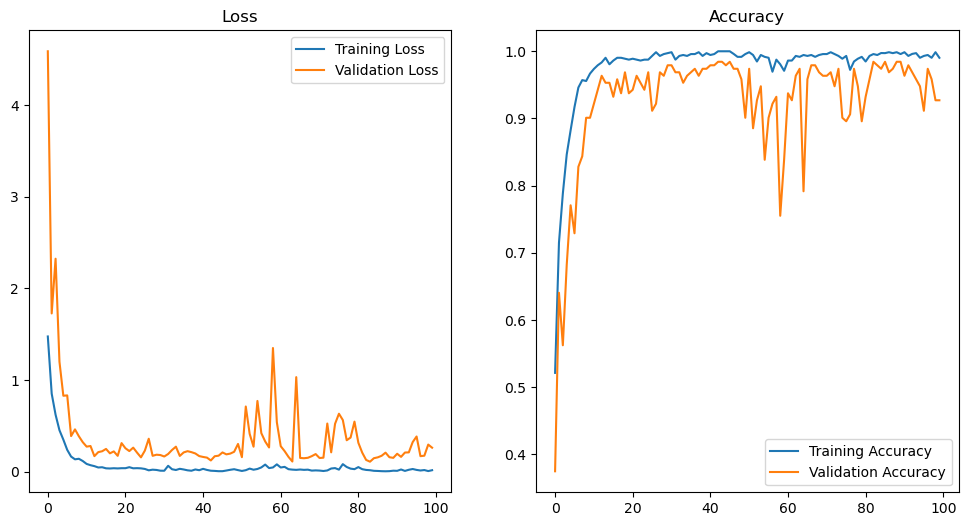

In [14]:
# Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

# AGAIN IAM APPLYIG HERE VGG19 , EVERY OTHER IS SAMETHING EPOCHES LAYERS ALL SAME JUST VGG19 APPLY


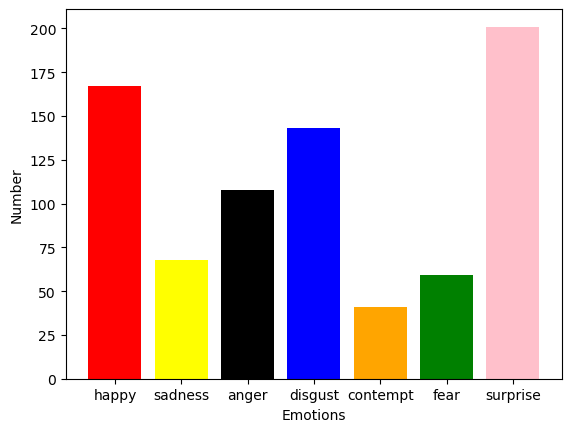

Found 787 images belonging to 7 classes.
Found 194 images belonging to 7 classes.
Train and Validation sets have been created.
Above data generator functions have been created.
Above data generator functions have been created.
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                

/tmp/ipykernel_20600/4133163298.py:139: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_ds,


12/12 [==============================] - 5s 319ms/step - loss: 1.6596 - accuracy: 0.4606 - val_loss: 2.4656 - val_accuracy: 0.5417
Epoch 2/100
12/12 [==============================] - 5s 406ms/step - loss: 0.8981 - accuracy: 0.6916 - val_loss: 0.9942 - val_accuracy: 0.6979
Epoch 3/100
12/12 [==============================] - 5s 450ms/step - loss: 0.6843 - accuracy: 0.7552 - val_loss: 0.8832 - val_accuracy: 0.6979
Epoch 4/100
12/12 [==============================] - 4s 382ms/step - loss: 0.5628 - accuracy: 0.8064 - val_loss: 0.6860 - val_accuracy: 0.7500
Epoch 5/100
12/12 [==============================] - 4s 334ms/step - loss: 0.4038 - accuracy: 0.8575 - val_loss: 0.5916 - val_accuracy: 0.8229
Epoch 6/100
12/12 [==============================] - 5s 372ms/step - loss: 0.3672 - accuracy: 0.8741 - val_loss: 0.5089 - val_accuracy: 0.8125
Epoch 7/100
12/12 [==============================] - 4s 348ms/step - loss: 0.3070 - accuracy: 0.8990 - val_loss: 0.4122 - val_accuracy: 0.8125
Epoch 8/100

12/12 [==============================] - 4s 295ms/step - loss: 0.0290 - accuracy: 0.9959 - val_loss: 0.2322 - val_accuracy: 0.9740
Epoch 59/100
12/12 [==============================] - 4s 301ms/step - loss: 0.0331 - accuracy: 0.9862 - val_loss: 0.2220 - val_accuracy: 0.9740
Epoch 60/100
12/12 [==============================] - 4s 299ms/step - loss: 0.0186 - accuracy: 0.9959 - val_loss: 0.2089 - val_accuracy: 0.9740
Epoch 61/100
12/12 [==============================] - 4s 313ms/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 0.2126 - val_accuracy: 0.9740
Epoch 62/100
12/12 [==============================] - 4s 297ms/step - loss: 0.0147 - accuracy: 0.9959 - val_loss: 0.2115 - val_accuracy: 0.9792
Epoch 63/100
12/12 [==============================] - 4s 301ms/step - loss: 0.0145 - accuracy: 0.9959 - val_loss: 0.2098 - val_accuracy: 0.9792
Epoch 64/100
12/12 [==============================] - 4s 313ms/step - loss: 0.0296 - accuracy: 0.9876 - val_loss: 0.2191 - val_accuracy: 0.9792
Epoch

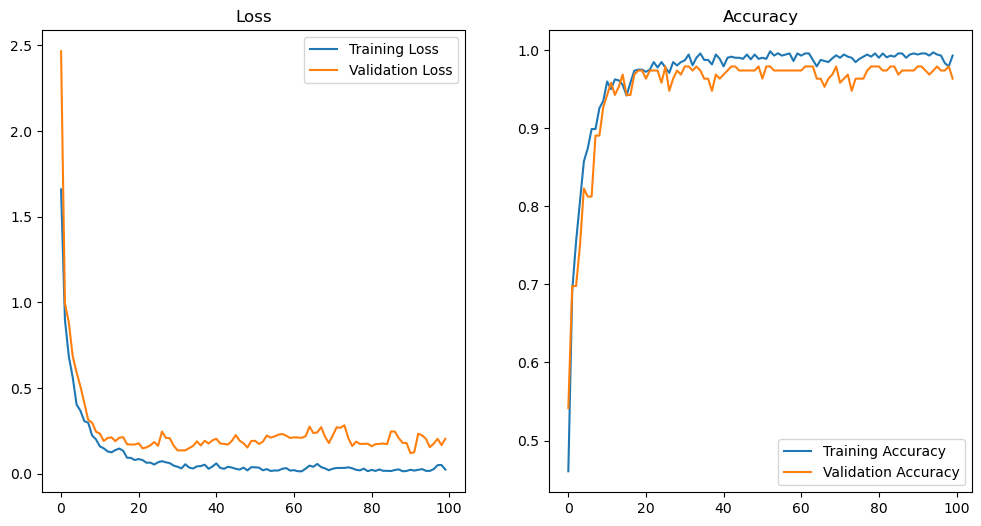

In [15]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.utils import plot_model
from keras import regularizers
from tensorflow.keras.utils import plot_model
from keras.preprocessing import image

#HISTOGRAM CODE
#histogram code
import matplotlib.pyplot as plt
import os

emotions = ["happy", "sadness", "anger", "disgust", "contempt", "fear", "surprise"]

folder_path = "CK+48/train"
# Counting the number of images per emotion
counts = [len(os.listdir(os.path.join(folder_path, emotion))) for emotion in emotions]

# Plotting the bar chart
colors = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink']
plt.bar(emotions, height=counts, color=colors)
plt.ylabel('Number')
plt.xlabel('Emotions')
plt.savefig('hostgoarm.png')
plt.show()


batch_size  = 64
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_ds = datagen_train.flow_from_directory("CK+48/train",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True)


test_ds = datagen_val.flow_from_directory("CK+48/validation",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)
print('Train and Validation sets have been created.')





# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')
# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')





#model vgg19

from keras.applications.vgg19 import VGG19
conv_base = VGG19(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)

conv_base.summary()

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

model.summary()






# Visualize the model.
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

conv_base.trainable = False

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')


epochs = 100

history = model.fit_generator(generator=train_ds,
                                steps_per_epoch=train_ds.n//train_ds.batch_size,
                                epochs=epochs,
                                validation_data = test_ds,
                                validation_steps = test_ds.n//test_ds.batch_size,
                                
                                )
print('Your model has been trained!!')
     
    
    
    
    
    
    # Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()